# Question 1

Calculate the closeness centrality of each of the nodes in this network:

In [2]:
#Imports Libraries 

# complex networks package - guide https://networkx.org/ 
import networkx as nx

# visualization packages - https://matplotlib.org/ 
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.drawing.nx_agraph import graphviz_layout

# n-dinsional array tool - https://numpy.org/ 
import numpy as np

import pygraphviz

import matplotlib.colors as mcolors

import scipy

# for Notebook
%matplotlib inline


In [51]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    
    plt.axis('off')
    plt.show()

In [12]:
G1 = nx.Graph()

edge_list = [(1,2),(1,5),(1,6),(2,3),(2,7),(3,4),(3,8),(4,5),(4,9),(5,10),(6,8),(6,9),(7,9),(7,10),(8,10)]
G1.add_edges_from(edge_list)
print(nx.closeness_centrality(G1))


#

{1: 0.6, 2: 0.6, 5: 0.6, 6: 0.6, 3: 0.6, 7: 0.6, 4: 0.6, 8: 0.6, 9: 0.6, 10: 0.6}


In [12]:
#Create new directed graph
dG = nx.DiGraph()

edge_list3 = [(1,2),(1,3),(2,1),(2,4),(3,1),(3,2),(4,3),(4,2)]


dG.add_edges_from(edge_list3)

print(nx.reciprocity(dG))

0.75


In [23]:
m = 8

A = nx.adjacency_matrix(dG).todense()

A2 = A * A

Tr = np.trace(A2)

frac = 1/m

reciprocity = Tr*frac
print(A2)

[[2 1 0 1]
 [0 2 2 0]
 [1 1 1 1]
 [2 1 0 1]]


/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_13166/1754194894.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(dG).todense()


In [ ]:
2/()

# Question 2

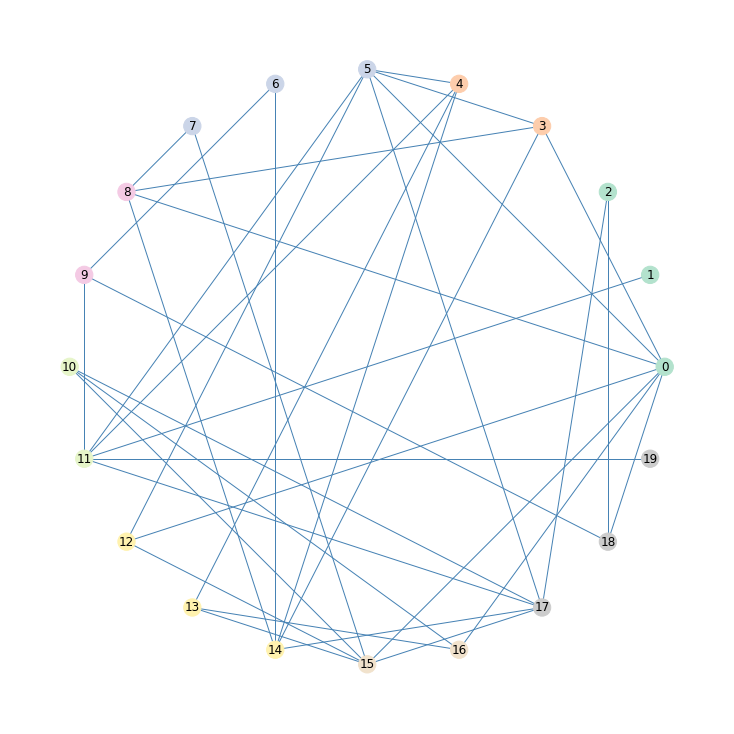

In [27]:
G2 = nx.gnp_random_graph(20, 0.2, seed=1096)

plt.figure(figsize = (10,10))
nx.draw_circular(G2, with_labels = True, edge_color = "#4682b4", node_color = range(len(G2)) , cmap = plt.cm.Pastel2)
plt.show()


In [16]:
#Transitivity of G2
nx.transitivity(G2)

0.18461538461538463

In [15]:
#Average Clustering of G2

nx.average_clustering(G2)

0.14785714285714285

In [17]:
#Clustering Coefficient for G2

nx.clustering(G2)

{0: 0.19047619047619047,
 1: 0,
 2: 0,
 3: 0.5,
 4: 0.16666666666666666,
 5: 0.26666666666666666,
 6: 0,
 7: 0,
 8: 0.3333333333333333,
 9: 0,
 10: 0.3333333333333333,
 11: 0.13333333333333333,
 12: 0.6666666666666666,
 13: 0,
 14: 0.1,
 15: 0.13333333333333333,
 16: 0,
 17: 0.13333333333333333,
 18: 0,
 19: 0}

In [ ]:
#Color mapping

In [18]:
#Degree Asortivity of G2

nx.degree_assortativity_coefficient(G2)

-0.15411049431668053

In [56]:
def metrics(p):

    G = nx.gnp_random_graph(20, p, seed=1096)
    
    trans = nx.transitivity(G)
    avg = nx.average_clustering(G)
    clust = nx.clustering(G)
    assort = nx.degree_assortativity_coefficient(G)

    pos = nx.spring_layout(G)
    draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')
    draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
    draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')
    return print("transitivity is:" ,trans, "\nAverage clustering is" ,avg, "\nClustering coefficient is" ,clust, "\nDegree Assortivity: ", assort)


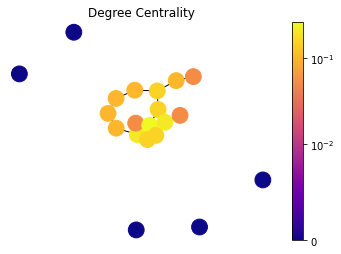

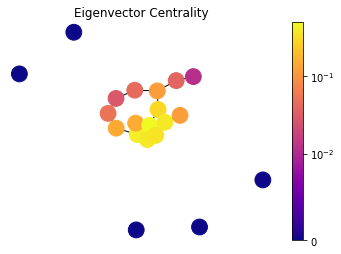

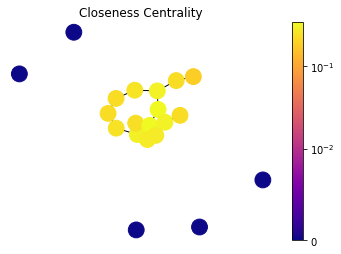

transitivity is: 0.23076923076923078 
Average clustering is 0.10166666666666666 
Clustering coefficient is {0: 0.3333333333333333, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0.2, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0.3333333333333333, 12: 0.6666666666666666, 13: 0, 14: 0, 15: 0.3333333333333333, 16: 0, 17: 0.16666666666666666, 18: 0, 19: 0} 
Degree Assortivity:  0.07805907172995712


In [57]:
metrics(0.1)

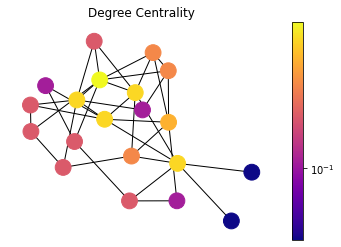

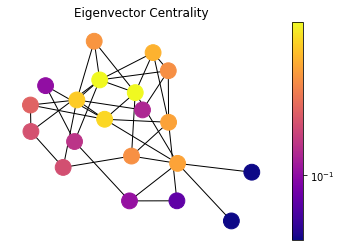

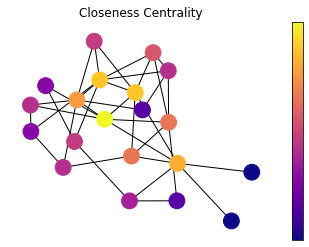

transitivity is: 0.18461538461538463 
Average clustering is 0.14785714285714285 
Clustering coefficient is {0: 0.19047619047619047, 1: 0, 2: 0, 3: 0.5, 4: 0.16666666666666666, 5: 0.26666666666666666, 6: 0, 7: 0, 8: 0.3333333333333333, 9: 0, 10: 0.3333333333333333, 11: 0.13333333333333333, 12: 0.6666666666666666, 13: 0, 14: 0.1, 15: 0.13333333333333333, 16: 0, 17: 0.13333333333333333, 18: 0, 19: 0} 
Degree Assortivity:  -0.15411049431668053


In [58]:
metrics(0.2)

In [37]:
# p = c /(n-1)
val = np.arange(1,2, 0.00001).tolist()

newVal = []
for i in val:
    p = i/19
    newVal.append(p)

print(newVal[1])

0.0526321052631579


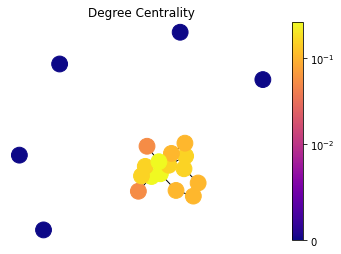

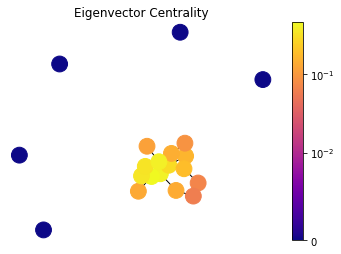

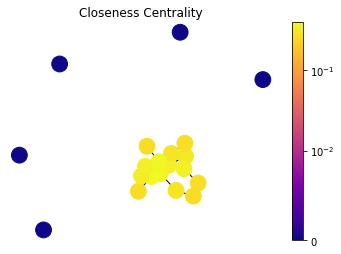

transitivity is: 0.18 
Average clustering is 0.09166666666666666 
Clustering coefficient is {0: 0.2, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0.2, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0.3333333333333333, 12: 0.6666666666666666, 13: 0, 14: 0, 15: 0.3333333333333333, 16: 0, 17: 0.1, 18: 0, 19: 0} 
Degree Assortivity:  -0.11258278145695431


In [62]:
metrics(newVal[-1])


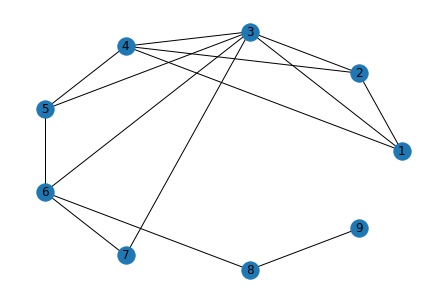

In [30]:
G3 = nx.Graph()

edge_list2 = [(1,2),(1,3),(1,4),(2,3),(2,4),(3,4),(3,5),(3,6),(3,7),(4,5),(5,6),(6,7),(6,8),(8,9)]
G3.add_edges_from(edge_list2)
nx.draw_circular(G3, with_labels = True)

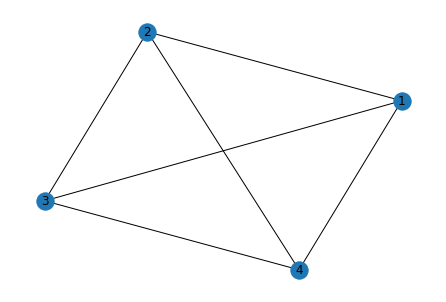

In [36]:
K = nx.k_core(G3)

nx.draw(K, with_labels = True)

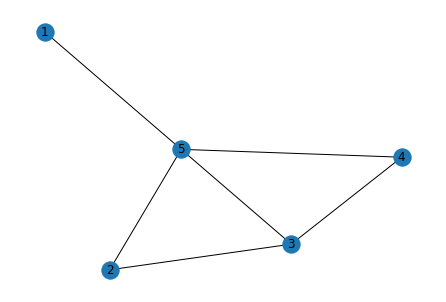

In [26]:
G4 = nx.Graph()

edge_list4 = [(1,5),(5,2),(5,4),(5,3),(3,4),(3,2)]

G4.add_edges_from(edge_list4)

nx.draw(G4, with_labels = True)

In [27]:
print(nx.clustering(G4))

{1: 0, 5: 0.3333333333333333, 2: 1.0, 4: 1.0, 3: 0.6666666666666666}


In [28]:
G5 = nx.Graph()

edge_list5 = [(1,2),(1,3),(2,3),(3,4)]

G5.add_edges_from(edge_list5)

print(nx.clustering(G5))

{1: 1.0, 2: 1.0, 3: 0.3333333333333333, 4: 0}


In [34]:
k =5

a = 2*20

a2 = a -1
print(k/a)

0.125
